# Solution- Analysing the Eu-anomaly

## Instant Review & Quiz

<b>I1. <font color = brown>Opinion–:</font><br>With regard to a program like analysing the Eu-anomaly: how much time and skill do you think is requried to preciscly define the calculation and how it is executed? and how much time and skill do you think is required to write the code?</b>

<font color = darkgreen><b>
    I think that understanding and preparing the actual calculation, i.e., everything before coding requires great attention and time. The code might still also take some time. But without concentrated preparation, coding will quickly become futile.
</b></font>

<b>Q1. In the .dropna() method: how do you delete all datasets that have at least one value?</b><br>
.dropna(0, 'all')<br>
.dropna(0)

<font color = darkgreen><b>
    .dropna(0)
</b></font>

## Practise

We now want to calculate the anomaly of every REE element.<br>
The element of interest shall be selectable from a drop-down menu.<br>
Start with importing the required libraries and/or commands.

In [147]:
import pandas as pd

Below we will ned the REE CI concentrations. We will start with extracting these.<br>
To do this, read in the CI data from 'chondrite element abundances.xlsx' into the variable 'cIdf'.<br>
Define a command to find the index of a specific element.

In [150]:
cIdf = pd.read_excel('data/chondrite element abundances.xlsx')


def posRow(name):
    return cIdf.index[cIdf['Element'] == name][0]

Store this handy posRow() command in your 'mineralogyModule.py'.

Use this command to select only the datasates with the SEE.

In [151]:
cIdf.loc[posRow('La'):posRow('Lu')]

,z,Element,Einheit,CI,CM,CV,CO,CK,CR,CH,H,L,LL,EH,EL,R,K
56,57,La,ppm,0.235,0.320,0.469,0.380,0.460,0.310,0.290,0.301,0.318,0.330,0.240,0.196,0.310,0.320
57,58,Ce,ppm,0.620,0.940,1.190,1.140,1.270,0.750,0.870,0.763,0.970,0.880,0.650,0.580,0.830,NaN
58,59,Pr,ppm,0.094,0.137,0.174,0.140,NaN,NaN,NaN,0.120,0.140,0.130,0.100,0.070,NaN,NaN
59,60,Nd,ppm,0.460,0.626,0.919,0.850,0.990,0.790,NaN,0.581,0.700,0.650,0.440,0.370,NaN,NaN
60,61,Pm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,62,Sm,ppm,0.150,0.204,0.294,0.250,0.290,0.230,0.185,0.194,0.203,0.205,0.140,0.149,0.180,0.200
62,63,Eu,ppm,0.057,0.078,0.105,0.096,0.110,0.080,0.076,0.074,0.080,0.078,0.052,0.054,0.072,0.080
63,64,Gd,ppm,0.200,0.290,0.405,0.390,0.440,0.320,0.290,0.275,0.317,0.290,0.210,0.196,NaN,NaN
64,65,Tb,ppm,0.037,0.051,0.071,0.060,NaN,0.050,0.050,0.049,0.059,0.054,0.034,0.032,NaN,NaN
65,66,Dy,ppm,0.250,0.332,0.454,0.420,0.490,0.280,0.310,0.305,0.372,0.360,0.230,0.245,0.029,NaN


Extract the CI SEE (-> from La to Lu) concentrations as a list from the imported chondrite element abundances file. Make sure you extracted the correct values.<br>
Delete Pm from this list.

In [152]:
cIREE = cIdf.loc[posRow('La'):posRow('Lu'), 'CI'].tolist()

cIREE.pop(4)

cIREE

[0.235,
 0.62,
 0.094,
 0.46,
 0.15,
 0.057,
 0.2,
 0.037,
 0.25,
 0.056,
 0.16,
 0.025,
 0.16,
 0.025]

Below follows the program from the corresponding unit. Convert this program into a command called 'calcREEAnomaly'. Input to the command shall only be the REE element for which the anomlay shall be calculated, and the dataset, for which the anomaly shall be calculated<br>
As this is not trivial, I will provide a step by step solution below – or you could try it for yourself.

In [153]:
cISmEuGd = [.15, .057, .2]
smEuGdData = df.loc[:, ['Sm', 'Eu', 'Gd']].dropna(0) / cISmEuGd

res = []

for n in range(len(smEuGdData)):
    l = smEuGdData.iloc[n].tolist()
    euAn = ((l[1] / ((l[0] + l[2]) / 2)) - 1) * 100
    res.append(round(euAn))

As we only have the REE for which the anomaly shall be calculated, we first need modify the program to accomodate for this.<br>
First, produce a list of the names of the REE without Pm.

In [170]:
ree = cIdf.loc[posRow('La'):posRow('Lu'), 'Element'].tolist()

ree.pop(4)

ree

['La',
 'Ce',
 'Pr',
 'Nd',
 'Sm',
 'Eu',
 'Gd',
 'Tb',
 'Dy',
 'Ho',
 'Er',
 'Tm',
 'Yb',
 'Lu']

Using the input REE, produce the list of the 3 REE called 'threeREE' required for calculating the anomaly.

In [171]:
# input REE
el = 'Eu'

# either

leftREE = ree[ree.index(el) - 1]
rightREE =ree[ree.index(el) + 1]

threeREE = [leftREE, el, rightREE]
print(threeREE)


# or
threeREE = [ree[ree.index(el) - 1], el, ree[ree.index(el) + 1]]

print(threeREE)

['Sm', 'Eu', 'Gd']
['Sm', 'Eu', 'Gd']


You can now do the same with the cIREE list, i.e., selcet the REE values for these elements.<br>
Now modify the program above:<br>
(i) so that the 3 REE are now automaticall chosen depending on the single REE input.
(ii) so that the 3 REE CI concentrations are now automaticall chosen depending on the single REE input.

In [172]:
el = 'Eu'

cISmEuGd = [cIREE[ree.index(el) - 1], cIREE[ree.index(el)], cIREE[ree.index(el) + 1]]
threeREE = [ree[ree.index(el) - 1], el, ree[ree.index(el) + 1]]

smEuGdData = df.loc[:, threeREE].dropna(0) / cISmEuGd

res = []

for n in range(len(smEuGdData)):
    l = smEuGdData.iloc[n].tolist()
    euAn = ((l[1] / ((l[0] + l[2]) / 2)) - 1) * 100
    res.append(round(euAn))

Finally you can convert this program into the command 'calcREEAnomaly' that calculates the anomaly of every REE (except for two, do you know which?), depending on user input.<br>

In [173]:
def calcREEAnomaly(el):
    cISmEuGd = [cIREE[ree.index(el) - 1], cIREE[ree.index(el)], cIREE[ree.index(el) + 1]]
    threeREE = [ree[ree.index(el) - 1], el, ree[ree.index(el) + 1]]

    smEuGdData = df.loc[:, threeREE].dropna(0) / cISmEuGd

    res = []

    for n in range(len(smEuGdData)):
        l = smEuGdData.iloc[n].tolist()
        euAn = ((l[1] / ((l[0] + l[2]) / 2)) - 1) * 100
        res.append(round(euAn))
    
    return res

Read in the 'West African Cratons.csv' dataset as df.

In [174]:
df = pd.read_csv('data/West African Craton.csv')

Finally test your freshly defined command with e.g., calcREEAnomaly('Eu').

In [175]:
calcREEAnomaly('Eu')

[-13,
 2,
 6,
 21,
 -65,
 -11,
 -23,
 15,
 -64,
 -46,
 12,
 -5,
 13,
 12,
 12,
 10,
 0,
 7,
 -2,
 -5,
 12,
 -3,
 -1]

Expand your command so it displays a graph rather than a list of values.

In [176]:
import matplotlib.pyplot as plt

In [177]:
def calcREEAnomaly(el):
    cISmEuGd = [cIREE[ree.index(el) - 1], cIREE[ree.index(el)], cIREE[ree.index(el) + 1]]
    threeREE = [ree[ree.index(el) - 1], el, ree[ree.index(el) + 1]]

    smEuGdData = df.loc[:, threeREE].dropna(0) / cISmEuGd

    res = []

    for n in range(len(smEuGdData)):
        l = smEuGdData.iloc[n].tolist()
        euAn = ((l[1] / ((l[0] + l[2]) / 2)) - 1) * 100
        res.append(round(euAn))
    
    plt.plot(res)
    
    return plt.show()

Test wheter it works.

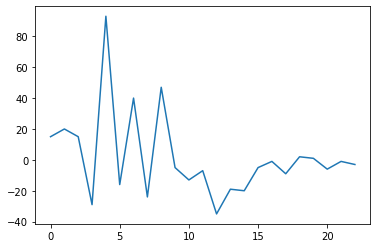

In [178]:
calcREEAnomaly('Sm')

Add this command to your 'mineralogyModule'.

And for easier usage, make it interactive, where you can choose the element from a drop-down menu – that displays only thos elements, for which anomalies can be calculated.<br>
(You might occassionally get an error, don't worry, just try another element. Most should work. The error is most likely because of some missing or zero values. These could be avoided with accoriding 'if' statements and some kind of informative message.)

In [163]:
from ipywidgets import interact

In [164]:
interact(calcREEAnomaly, el = ['Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb'])

interactive(children=(Dropdown(description='el', options=('Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho'…

<function __main__.calcREEAnomaly(el)>

Of course, now it might be intersting to add the REE plot beside the anomaly plot, etc. The fun just starts to begin (or at least the idea of it, which would be sufficient).

## What's wrong with this code?

### <font color = brown><b>Answer before executing the code!</b></font>

In [165]:
import matplotlib.pyplot as plt

xData = [2, 5, 3, 6, 9]
yData = [6, 2, 7, 4, 1]

plot(xData, yData)

show()

NameError: name 'plot' is not defined

'plt.' is missing before 'plot(...)' and 'show()'

In [166]:
l = [4, 5, 7, 2, 1]

for i in range[len[l]]:
    print(i + 4)

TypeError: 'builtin_function_or_method' object is not subscriptable

range and len need round brackets -> range(len(l))